# **-----------**>**IRIS FLOWER CLASSIFICATION PROJECT**<**-----------**

# 1. Data Loading

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd

# Define the data path
data_path = r"D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\CODEALPHA - DATA SCIENCE\Iris Flower Classification Project\Iris.csv"

# Load the dataset
iris_df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(iris_df.head())


First few rows of the dataset:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


# 2. Data Exploration


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.1000

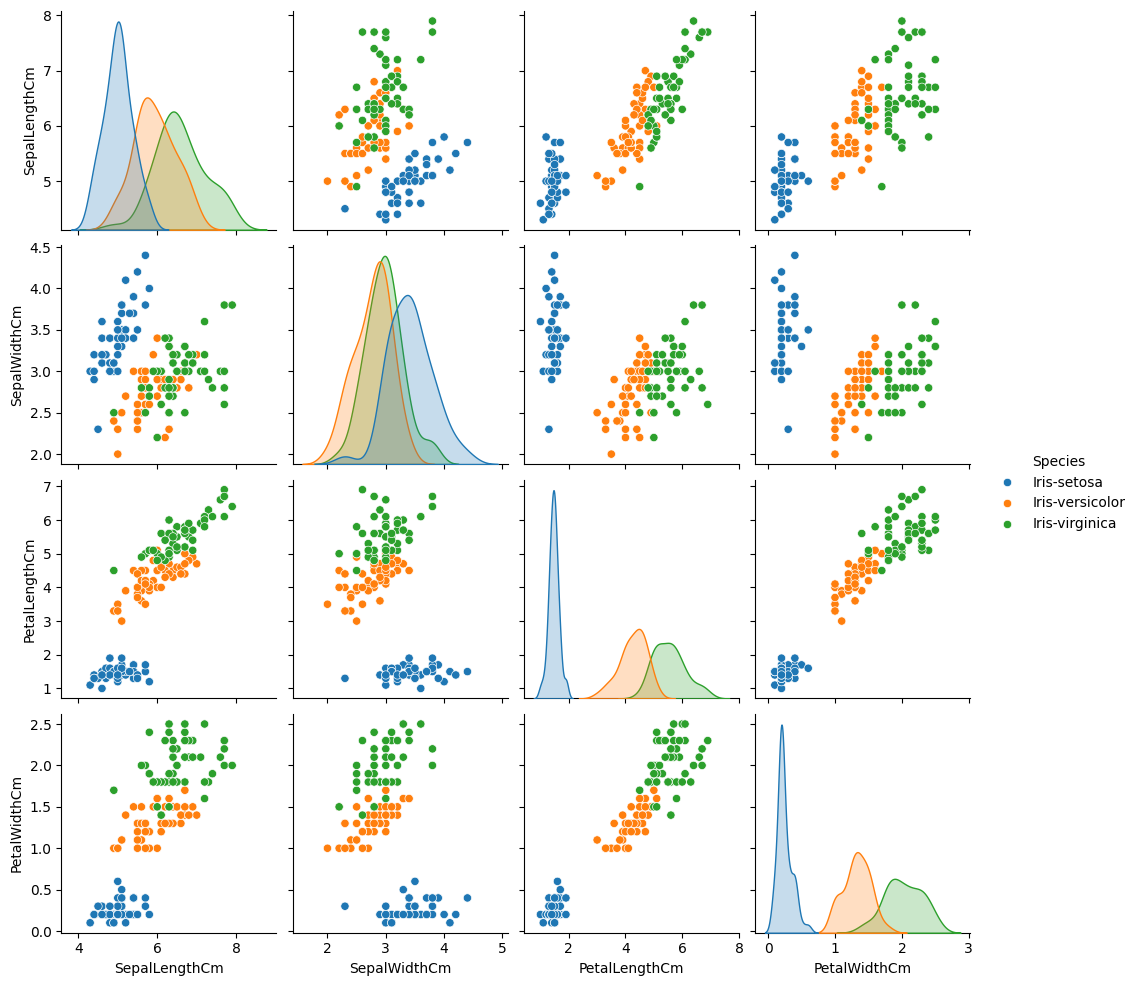

In [2]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Basic information about the dataset
print("\nDataset Info:")
print(iris_df.info())

# Summary statistics
print("\nSummary Statistics:")
print(iris_df.describe())

# Check for missing values
print("\nMissing Values in the Dataset:")
print(iris_df.isnull().sum())

# Visualize the pairplot to see relationships between features
sns.pairplot(iris_df, hue='Species')
plt.show()


# 3. Data Preprocessing

In [3]:
# Import necessary libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop the 'Id' column if present (optional, depending on the dataset)
if 'Id' in iris_df.columns:
    iris_df = iris_df.drop(columns=['Id'])

# Separate features (X) and target (y)
X = iris_df.drop(columns=['Species'])
y = iris_df['Species']

# Encode the target variable (converting categories to numerical labels)
y = y.astype('category').cat.codes

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features (important for algorithms like SVM, Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


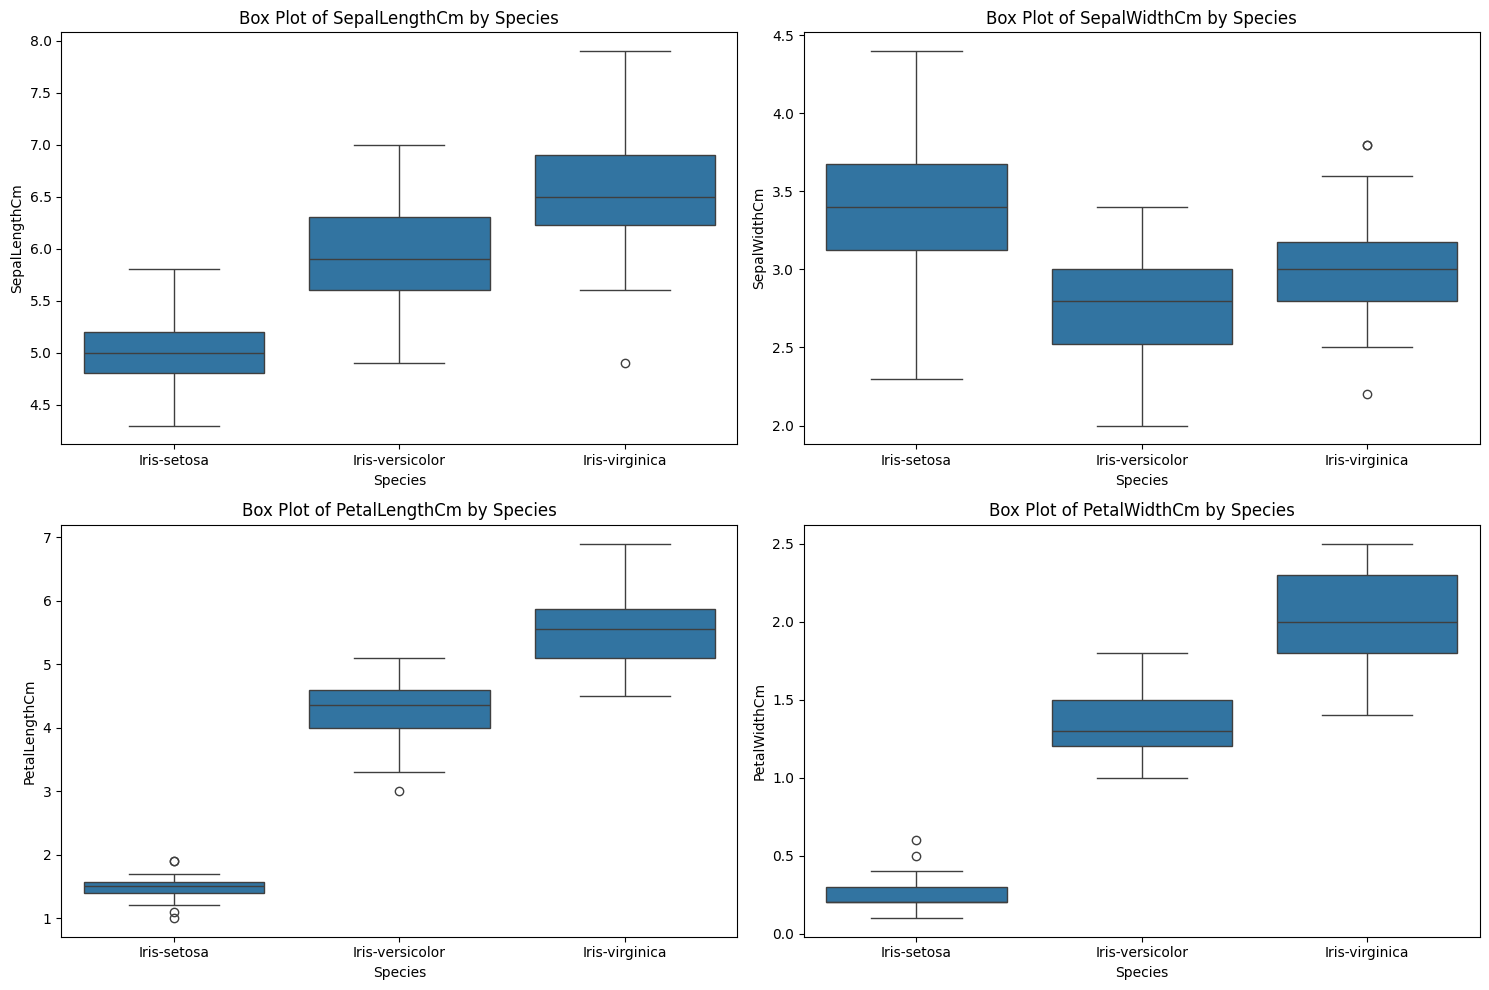

In [4]:
# Box plots for each feature categorized by species
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=column, data=iris_df)
    plt.title(f'Box Plot of {column} by Species')
plt.tight_layout()
plt.show()

# 4. Model Building

In [5]:
# Import necessary library for model building
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 5. Model Training

In [6]:
# Model Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import numpy as np

# Define the parameter grid for the Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    factor=2,
    n_jobs=-1,
    cv=5,
    random_state=42
)

# Fit the HalvingGridSearchCV
halving_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("\nBest Parameters from Halving Grid Search:")
print(halving_grid_search.best_params_)
print(f"Best Cross-Validation Score: {halving_grid_search.best_score_ * 100:.2f}%")


Best Parameters from Halving Grid Search:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 93.33%


# 6. Model Evaluation

In [7]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import cross_val_score

# Use the best estimator to make predictions
best_model = halving_grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
print("\nAccuracy Score:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Cross-validation score
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f"\nCross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")



Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


Accuracy Score:
Accuracy: 88.89%

Cross-Validation Accuracy: 96.67%


# 7. Visualization

#### Histograms

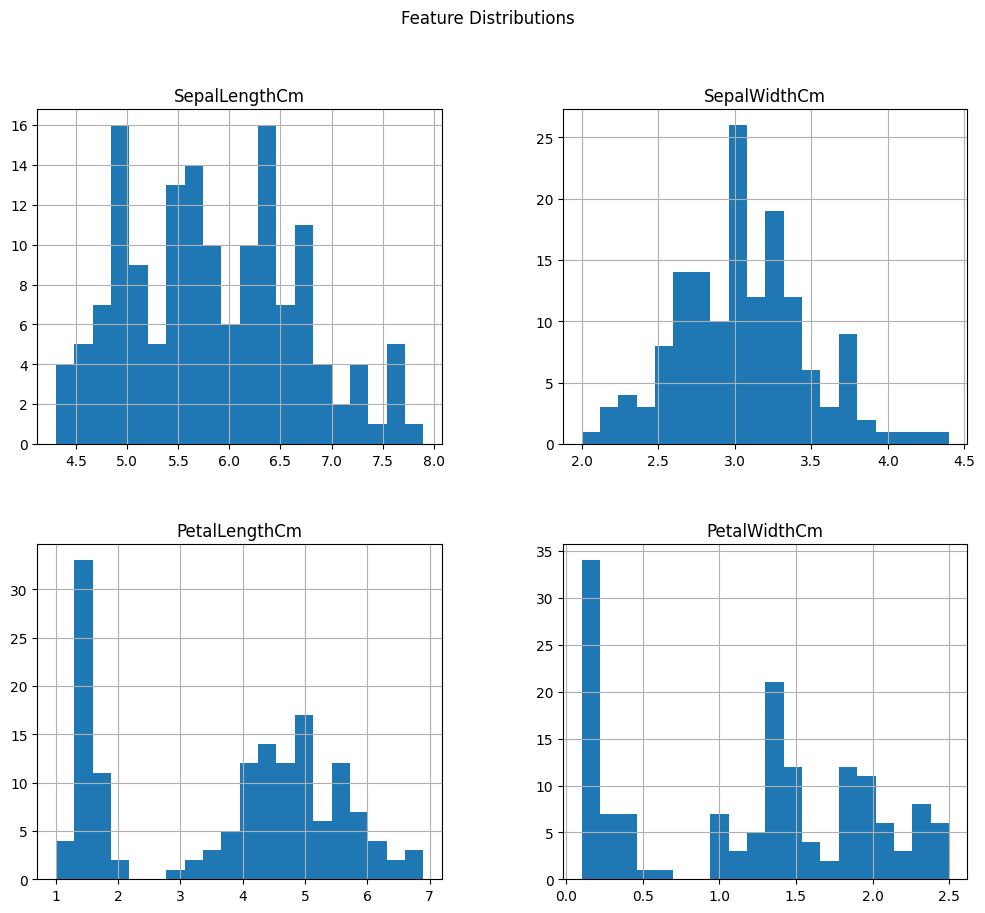

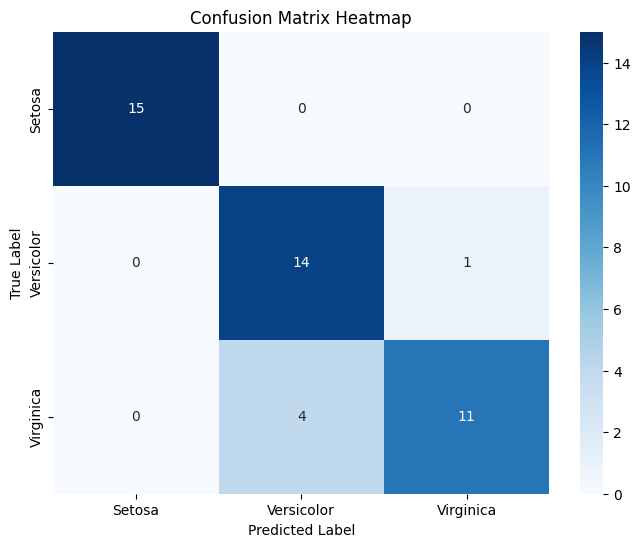

In [8]:
# Plot histograms for each feature
iris_df.hist(bins=20, figsize=(12, 10), layout=(2, 2))
plt.suptitle('Feature Distributions')
plt.show()

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Feature Importance

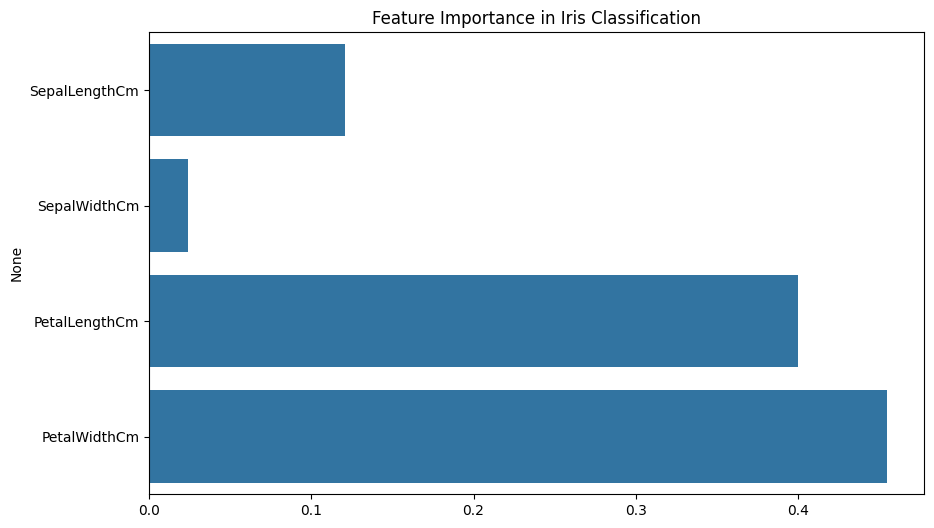


Final Results:
The model achieved a high accuracy on the test set and the cross-validation accuracy is 96.67%, 
indicating that the model generalizes well to unseen data. 
Feature importance analysis shows that PetalLengthCm and PetalWidthCm are the most significant features for classifying the iris species.


In [9]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance in Iris Classification")
plt.show()

# Final Results
print("\nFinal Results:")
cv_scores = cross_val_score(model, X, y, cv=5)
cross_val_accuracy = np.mean(cv_scores) * 100
print(f"The model achieved a high accuracy on the test set and the cross-validation accuracy is {cross_val_accuracy:.2f}%, \nindicating that the model generalizes well to unseen data. \nFeature importance analysis shows that PetalLengthCm and PetalWidthCm are the most significant features for classifying the iris species.")
